CODE TO EXPLORE AND MAYBE LOOK AT TESTING ACCURACY OF INITIAL DATA FROM SNOWFLAKE MARKETPLACE (FLIPSIDE CRYPTO) FOR POLYGON ONCHAIN DATA

In [21]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple, List
from sklearn.preprocessing import StandardScaler
import os

# Load the dataset
data = pd.read_csv('../data/raw_data/initial_raw_data_polygon.csv')



In [22]:
#EDA of the dataset
for col in data.columns:
    print(f"\n--- Descriptive statistics for column: {col} ---")
    print(data[col].describe())


--- Descriptive statistics for column: WALLET ---
count                                          50000
unique                                         50000
top       0x429b8474bd7308b7787d364985bb4b8ea7de1d47
freq                                               1
Name: WALLET, dtype: object

--- Descriptive statistics for column: TX_PER_MONTH ---
count     50000.000000
mean        344.769023
std        6311.089609
min           0.166667
25%           1.000000
50%           8.333333
75%          24.666667
max      429229.833333
Name: TX_PER_MONTH, dtype: float64

--- Descriptive statistics for column: TOKEN_DIVERSITY ---
count    50000.000000
mean         6.308760
std         38.143845
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1631.000000
Name: TOKEN_DIVERSITY, dtype: float64

--- Descriptive statistics for column: PROTOCOL_DIVERSITY ---
count    5.000000e+04
mean     1.225921e+02
std      1.189325e+04
min      0.000000e+00
25%     

In [26]:
# Transform dataset using preprocessing functions from source_code_package
import sys
sys.path.append('../source_code_package')

# Reload the module to get the latest version
import importlib
if 'data.preprocess_cluster' in sys.modules:
    importlib.reload(sys.modules['data.preprocess_cluster'])

from data.preprocess_cluster import preprocess_for_clustering

# Apply log transformation and scaling to the data
print("Applying preprocessing transformations...")
data_transformed, preprocessing_info = preprocess_for_clustering(
    data_path='../data/raw_data/initial_raw_data_polygon.csv',
    apply_log_transform=True,
    apply_scaling=True
)

print(f"\nOriginal data shape: {data.shape}")
print(f"Transformed data shape: {data_transformed.shape}")
print(f"\nPreprocessing steps applied: {preprocessing_info['steps_applied']}")
print(f"Log transformed columns: {len(preprocessing_info['log_transformed_columns'])}")
print(f"Scaled columns: {len(preprocessing_info['scaled_columns'])}")

# Update the data variable to use transformed data for plotting
data = data_transformed.copy()

Applying preprocessing transformations...
Applied log1p transformation to TOKEN_DIVERSITY (contained zero/negative values)
Applied log1p transformation to PROTOCOL_DIVERSITY (contained zero/negative values)
Applied log1p transformation to TOTAL_TRANSFER_USD (contained zero/negative values)
Applied log transformation to INTERACTION_DIVERSITY
Applied log1p transformation to AVG_TRANSFER_USD (contained zero/negative values)
Applied log1p transformation to USD_TRANSFER_STDDEV (contained zero/negative values)
Applied log1p transformation to DEX_EVENTS (contained zero/negative values)
Applied log1p transformation to GAMES_EVENTS (contained zero/negative values)
Applied log1p transformation to CEX_EVENTS (contained zero/negative values)
Applied log1p transformation to DAPP_EVENTS (contained zero/negative values)
Applied log1p transformation to CHADMIN_EVENTS (contained zero/negative values)
Applied log1p transformation to DEFI_EVENTS (contained zero/negative values)
Applied log1p transformati

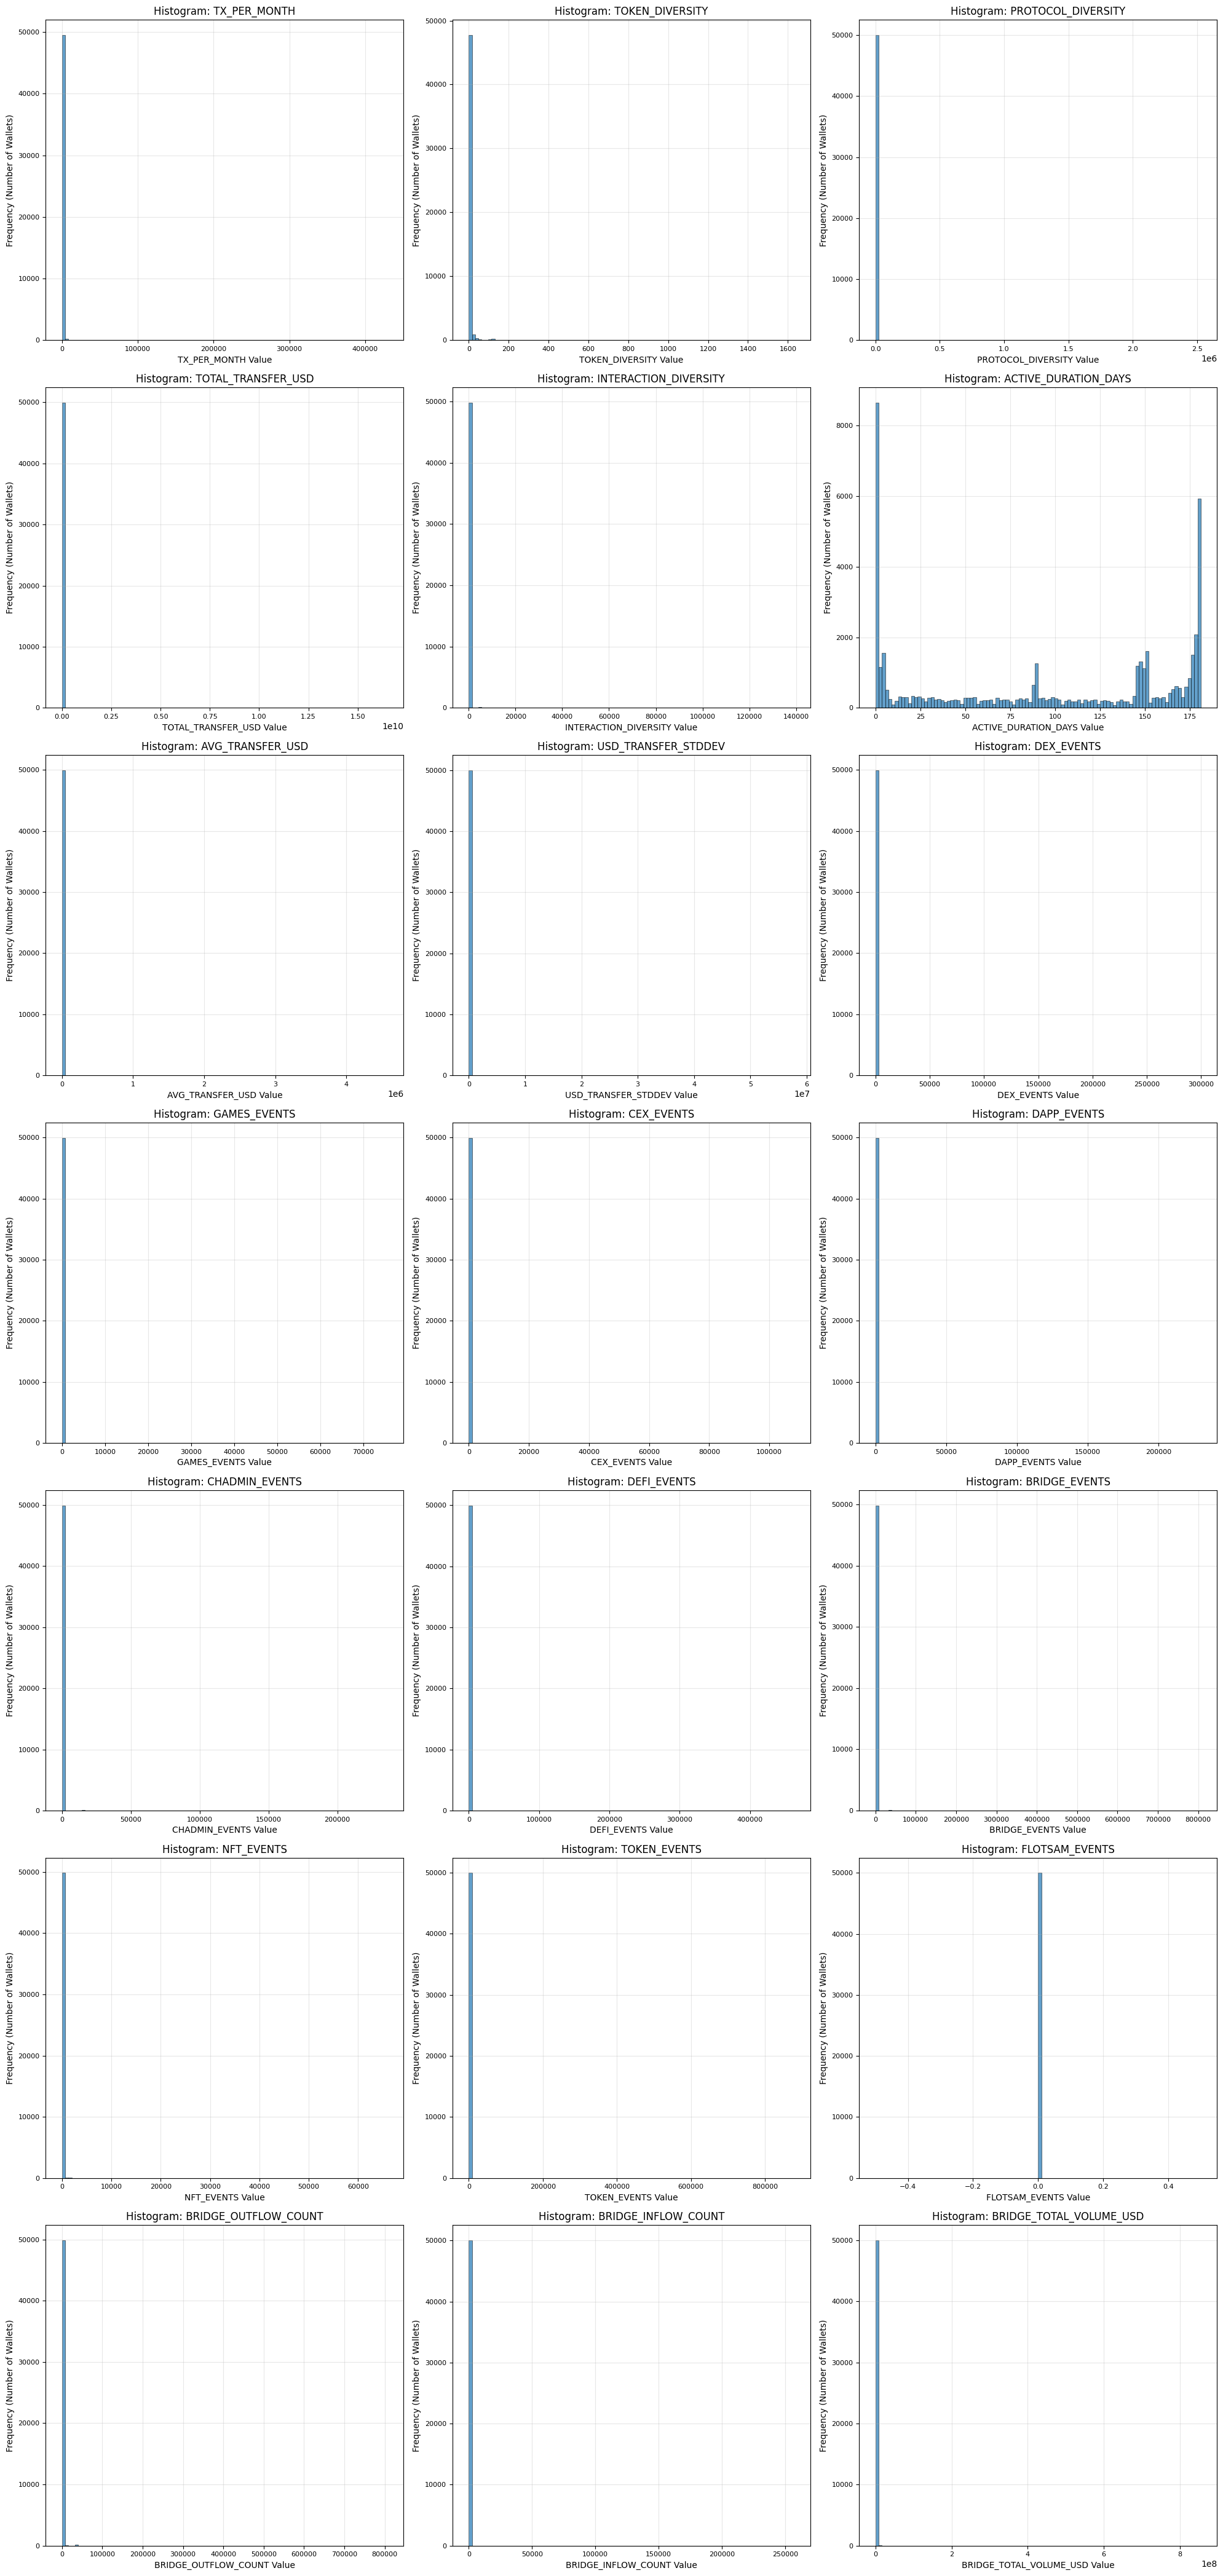

In [14]:
# Create histograms for all numeric features
# Each histogram shows the distribution of values for that feature

# Get all numeric columns (excluding WALLET column)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate number of subplots needed
n_cols = 3  # Number of columns in subplot grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)  # Ensure axes is 2D array
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# Flatten axes for easier iteration if needed
axes_flat = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

for i, column in enumerate(numeric_columns):
    if i < len(axes_flat):
        ax = axes_flat[i]
        
        # Create histogram
        ax.hist(data[column], bins=100, alpha=0.7, edgecolor='black', linewidth=0.5)
        ax.set_xlabel(f'{column} Value')
        ax.set_ylabel('Frequency (Number of Wallets)')
        ax.set_title(f'Histogram: {column}')
        ax.grid(True, alpha=0.3)
        
        # Add some basic formatting
        ax.tick_params(axis='both', which='major', labelsize=8)

# Remove empty subplots
for i in range(len(numeric_columns), len(axes_flat)):
    axes_flat[i].remove()

plt.tight_layout()
plt.show()